In [27]:
!git add .

In [29]:
!git commit -m 'first commit'
!git push git push master upto_color_chaehoon

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
error: src refspec push does not match any
error: src refspec upto_color_chaehoon does not match any
error: failed to push some refs to 'git'


In [ ]:
from collection
from collections import namedtuple
from math import sqrt
import random
try:
    import Image
except ImportError:
    from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## Image 내 색상 percentage

In [ ]:
# 바그래프
def plot_colors(hist, centroids):
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	for (percent, color) in zip(hist, centroids):
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color, -1)
		startX = endX
	#color.astype("uint8").tolist()
	return bar

In [ ]:
def kmeans2(path):
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #bgr -> rgb
  plt.imshow(img)
  #kmeans
  img=img.reshape((img.shape[1]*img.shape[0],3))

  #5개의 색상으로 clustering
  kmeans=KMeans(n_clusters=5,n_init=10)
  s=kmeans.fit(img)

  labels=kmeans.labels_
  #print(labels)
  labels=list(labels)

  centroid=kmeans.cluster_centers_
  #print(centroid)
  #각각 rgb 색상값

  percent=[]
  for i in range(len(centroid)):
    j=labels.count(i)
    j=j/(len(labels))
    percent.append(j)
  bar = plot_colors(percent, centroid)
  # text = "30%"
  # cv2.putText(bar,text,(50,25), cv2.FONT_HERSHEY_PLAIN, 0.5, (0,0,0), 1, cv2.LINE_AA)
  # # show our color bart
  plt.figure()
  plt.axis("off")
  plt.imshow(bar)
  plt.show()
  return percent, centroid

## 색상계열 확인


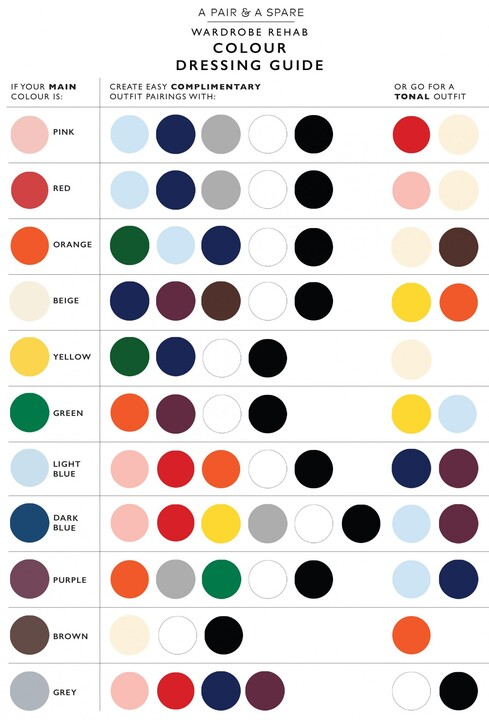

## cosine distance
- 벡터의 방향에 초점

In [ ]:
from scipy.spatial import distance
from numpy import dot
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
import math

color_names = ['빨강','주황','베이지','노랑','초록','하늘','남색','보라','갈색','회색', '검은색','하얀색','핑크','연두']
colors = [(216,31,40), (241,89 ,42), (250,237,205), (255,197,13), (0,120,73), (200,223,237), (22,72,113), (127,60,102) ,(73,50,48) , (174,181,189),(10,10,10),(255,255,255),(255,0,191),(90,225,106)]

#hex to rgb 변환
def hex_to_rgb(value):
    value = value.lstrip('#')
    return tuple(int(value[i:i+2], 16) for i in (0, 2, 4))

def cosine_similarity(tuple1, tuple2):
  cos_sim = dot(tuple1, tuple2)/(norm(tuple1)*norm(tuple2)+0.00000000001)
  return cos_sim
# def euclidean(p1, p2):
#     return sqrt(sum([
#         (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
#     ]))
#거리가 가장 작은 색상 반환
def color_distance(rgb_tuple):
  #코사인 유사도
  dis_cos = []
  #유클리디안 거리
  dis_eu = []
  #scaler 정의
  scaler_1 = StandardScaler()
  scaler_2 = StandardScaler()
  for i in range(len(color_names)):
    dis_cos.append(cosine_similarity(colors[i], rgb_tuple))
    dis_eu.append(math.dist(colors[i], rgb_tuple))
  dis_df_c = pd.DataFrame(dis_cos)
  dis_df_e = pd.DataFrame(dis_eu)
  dis_df_c = scaler_1.fit_transform(dis_df_c)
  dis_df_e = scaler_2.fit_transform(dis_df_e)
  dis_df_c_n_e = dis_df_c - dis_df_e
  #print(dis_df_c[0],dis_df_e[0],dis_df_c_n_e[0] )
  #print(dis_df_e)
  # print(dis_df)
  max_index = list(dis_df_c_n_e).index(max(list(dis_df_c_n_e)))
  return color_names[max_index]

In [ ]:
#함수 사용 순서
color_rgb = hex_to_rgb('#88c324')
color_line = color_distance(color_rgb)
print(color_line)

연두


In [ ]:
#color_dictionary
color_dict = {}
for i in range(len(color_names)):
  color_dict[color_names[i]]=colors[i]

In [ ]:
color_dict

In [ ]:
#딕셔너리 사용법 : 색상 넣으면 rgb값 출력 
color_dict['빨강']

(216, 31, 40)

## color 계열 추출 inference

In [ ]:
def make_color_line(percent, centroid):
  color_set = []
  color_list = []
  for i in centroid:
    #color_rgb = hex_to_rgb(i)
    color_line = color_distance(i)
    color_set.append(color_line)
    color_list.append(color_line)
    print(color_line)

  #중복 색 없앰
  color_set = list(set(color_set))
  #계열 별 percent 
  percent_set = [0]*len(color_set)
  for i in range(len(color_set)):
    for j in range(len(color_list)):
      if color_set[i] == color_list[j] :
        percent_set[i] += percent[j]
  #계열 이름과 percent - color_dict 정의
  centroid_new= []
  for i in color_set:
    centroid_new.append(color_dict[i]) 
  print("색상계열 / percent(20%이상만 출력)")
  for i in range(len(color_set)):
    if percent_set[i] >= 0.2:
      print(color_set[i],' : ', format(percent_set[i]*100, '.2f'),'%')
  # bar = plot_colors(percent_set, centroid_new)
  # plt.figure()
  # plt.axis("off")
  # plt.imshow(bar)
  # plt.show()

In [ ]:
#폴더 안 모든 이미지 불러오기
import os
path = '/content/drive/MyDrive/긱워커별 이미지 set1/'
file_list = os.listdir(path)

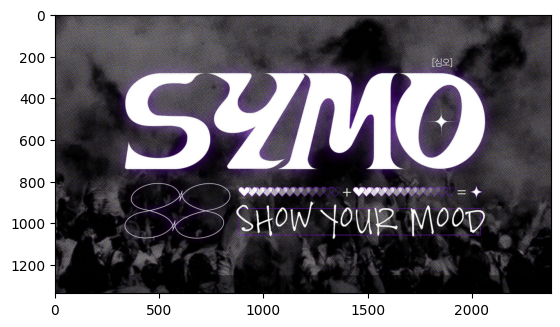

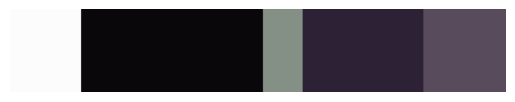

하얀색
검은색
회색
갈색
보라
색상계열 / percent(20%이상만 출력)
갈색  :  24.28 %
검은색  :  36.72 %


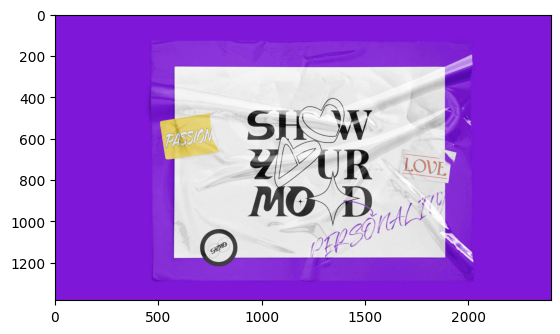

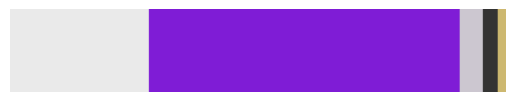

하얀색
보라
하늘
갈색
회색
색상계열 / percent(20%이상만 출력)
하얀색  :  28.01 %
보라  :  62.95 %


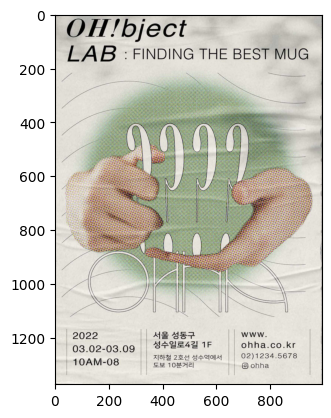

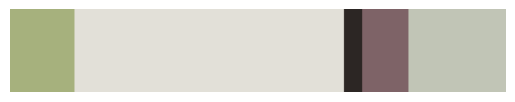

회색
베이지
갈색
보라
회색
색상계열 / percent(20%이상만 출력)
베이지  :  54.38 %
회색  :  32.54 %


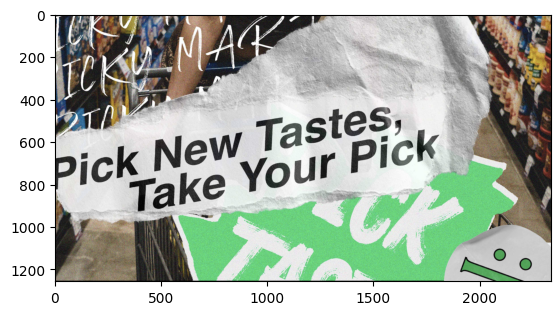

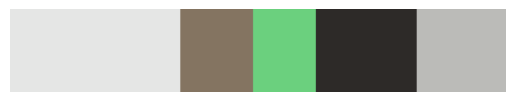

하늘
보라
연두
갈색
회색
색상계열 / percent(20%이상만 출력)
하늘  :  34.64 %
갈색  :  20.38 %


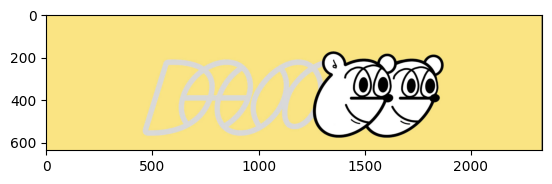

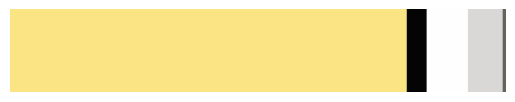

베이지
검은색
하얀색
하늘
보라
색상계열 / percent(20%이상만 출력)
베이지  :  80.13 %


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [ ]:
for i in file_list:
  path = '/content/drive/MyDrive/긱워커별 이미지 set1/'+i
  a = kmeans2(path)
  make_color_line(a[0],list(a[1]))